In [1]:
# Analyse de données
import chardet
import pandas as pd
import numpy as np

# Fonctions de prétraitement
from preprocess_utils import split_by_dtype, detect_outliers_iqr, detect_outliers_z_score

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
# Standardisation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from preprocess_utils import is_boolean_like

In [2]:
with open('data/houses_madrid_cleaned.feather', 'rb') as file :
    encodage = chardet.detect(file.read(10000))

print(encodage)

{'encoding': 'MacRoman', 'confidence': 0.6587804878048781, 'language': ''}


In [3]:
pd.options.display.max_columns = None
df = pd.read_feather("data/houses_madrid_cleaned.feather")

In [4]:
df.head()

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,is_floor_under,rent_price,buy_price,buy_price_by_area,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,product,neighborhood
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21742,64,60,2,1,<NA>,<NA>,3,0,471,85000,1328,0,0,1960,<NA>,<NA>,1,0,0,1,0,0,0,0,0,0,0,4,0,<NA>,<NA>,0,1,0,0,piso,135
21741,70,<NA>,3,1,<NA>,<NA>,4,0,666,129900,1856,1,0,<NA>,<NA>,<NA>,0,1,1,1,0,0,1,0,0,0,0,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,piso,132
21740,94,54,2,2,<NA>,<NA>,1,0,722,144247,1535,0,0,<NA>,0,1,0,1,1,1,0,0,0,0,1,0,0,<NA>,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,piso,134
21739,64,<NA>,2,1,<NA>,<NA>,bajo,1,583,109900,1717,0,0,1955,<NA>,<NA>,0,0,1,1,0,0,0,0,1,1,0,<NA>,0,<NA>,<NA>,0,0,1,0,piso,134
21738,108,90,2,2,<NA>,<NA>,4,0,1094,260000,2407,0,0,2003,<NA>,<NA>,1,1,1,1,0,1,0,0,1,0,1,<NA>,1,1,0,1,1,1,1,piso,133


In [5]:

# plt.figure(figsize=(20, 3))
# # sns.scatterplot(x=df['buy_price'], y=df['rent_price'], data=df)
# sns.scatterplot(x=df['buy_price'], y=df['rent_price'])
# plt.title("Rent vs Buy Price")
# plt.xlabel("Buy Price")
# plt.ylabel("Rent Price")
# # plt.ylim(0,)  # commence à 0
# plt.xscale('log')
# # plt.yscale('log')
# plt.show()


In [6]:
# df[['rent_price','buy_price']].describe()


<div style="
    background-color: #c8a043ff;
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<h3>Séparer les variables explicatives/indépendantes de la variable dépendante/cible</h3>
</div>

In [7]:
X = df.drop(columns=['buy_price'])
y = df['buy_price']

<div style="
    background-color: #c8a043ff;
    color: #fff; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
<h3>Séparer les données en train_set et test_set</h3>
</div>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.describe(include='all')

,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,is_floor_under,rent_price,buy_price_by_area,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_accessible,has_green_zones,energy_certificate,has_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east,product,neighborhood
count,17297.0,6563.0,17393.000000,17383.0,1114.0,1116.0,15344,16458.0,1.739300e+04,17393.000000,17393.0,16586.0,8028.0,10900.0,10900.0,17393.0,17393.0,15518.0,14988.0,17393.0,17393.0,17393.0,17393.0,17393.0,17393.0,17393.0,5610.0,17393.0,6167.0,6167.0,9084.0,9084.0,9084.0,9084.0,17393,17393
unique,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,19,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8,125
top,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,1,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,piso,23
freq,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,3567,<NA>,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,14205,393
mean,145.889403,102.757428,2.999540,2.083185,3.155296,245.475806,NaN,0.123952,-6.691599e+04,4018.741275,0.182775,0.070963,1969.521176,0.301927,0.698073,0.515265,0.617892,0.769493,0.905124,0.069683,0.236129,0.437187,0.152935,0.352671,0.189214,0.185477,4.501961,0.354568,0.922329,2620.469434,0.245707,0.35491,0.508697,0.445729,NaN,NaN
std,132.455117,86.539413,1.505548,1.401171,0.890266,246.639532,NaN,0.329537,1.018531e+06,1915.115223,0.386493,0.256772,31.10675,0.459115,0.459115,0.499781,0.485917,0.421171,0.293053,0.25462,0.424715,0.496053,0.359935,0.477815,0.39169,0.388695,1.669441,0.478396,0.267676,13814.623118,0.430529,0.478512,0.499952,0.497073,NaN,NaN
min,13.0,1.0,0.000000,1.0,1.0,1.0,NaN,0.0,-3.459028e+07,688.000000,0.0,0.0,1723.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
25%,70.0,59.0,2.000000,1.0,3.0,2.0,NaN,0.0,7.250000e+02,2544.000000,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
50%,100.0,79.0,3.000000,2.0,3.0,242.0,NaN,0.0,1.116000e+03,3723.000000,0.0,0.0,1970.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
75%,160.0,111.0,4.000000,2.0,4.0,354.0,NaN,0.0,1.678000e+03,5000.000000,0.0,0.0,1994.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,NaN,NaN


array([[<Axes: title={'center': 'sq_mt_built'}>,
        <Axes: title={'center': 'sq_mt_useful'}>,
        <Axes: title={'center': 'n_rooms'}>,
        <Axes: title={'center': 'n_bathrooms'}>,
        <Axes: title={'center': 'n_floors'}>,
        <Axes: title={'center': 'sq_mt_allotment'}>],
       [<Axes: title={'center': 'is_floor_under'}>,
        <Axes: title={'center': 'rent_price'}>,
        <Axes: title={'center': 'buy_price_by_area'}>,
        <Axes: title={'center': 'is_renewal_needed'}>,
        <Axes: title={'center': 'is_new_development'}>,
        <Axes: title={'center': 'built_year'}>],
       [<Axes: title={'center': 'has_central_heating'}>,
        <Axes: title={'center': 'has_individual_heating'}>,
        <Axes: title={'center': 'has_ac'}>,
        <Axes: title={'center': 'has_fitted_wardrobes'}>,
        <Axes: title={'center': 'has_lift'}>,
        <Axes: title={'center': 'is_exterior'}>],
       [<Axes: title={'center': 'has_garden'}>,
        <Axes: title={'center

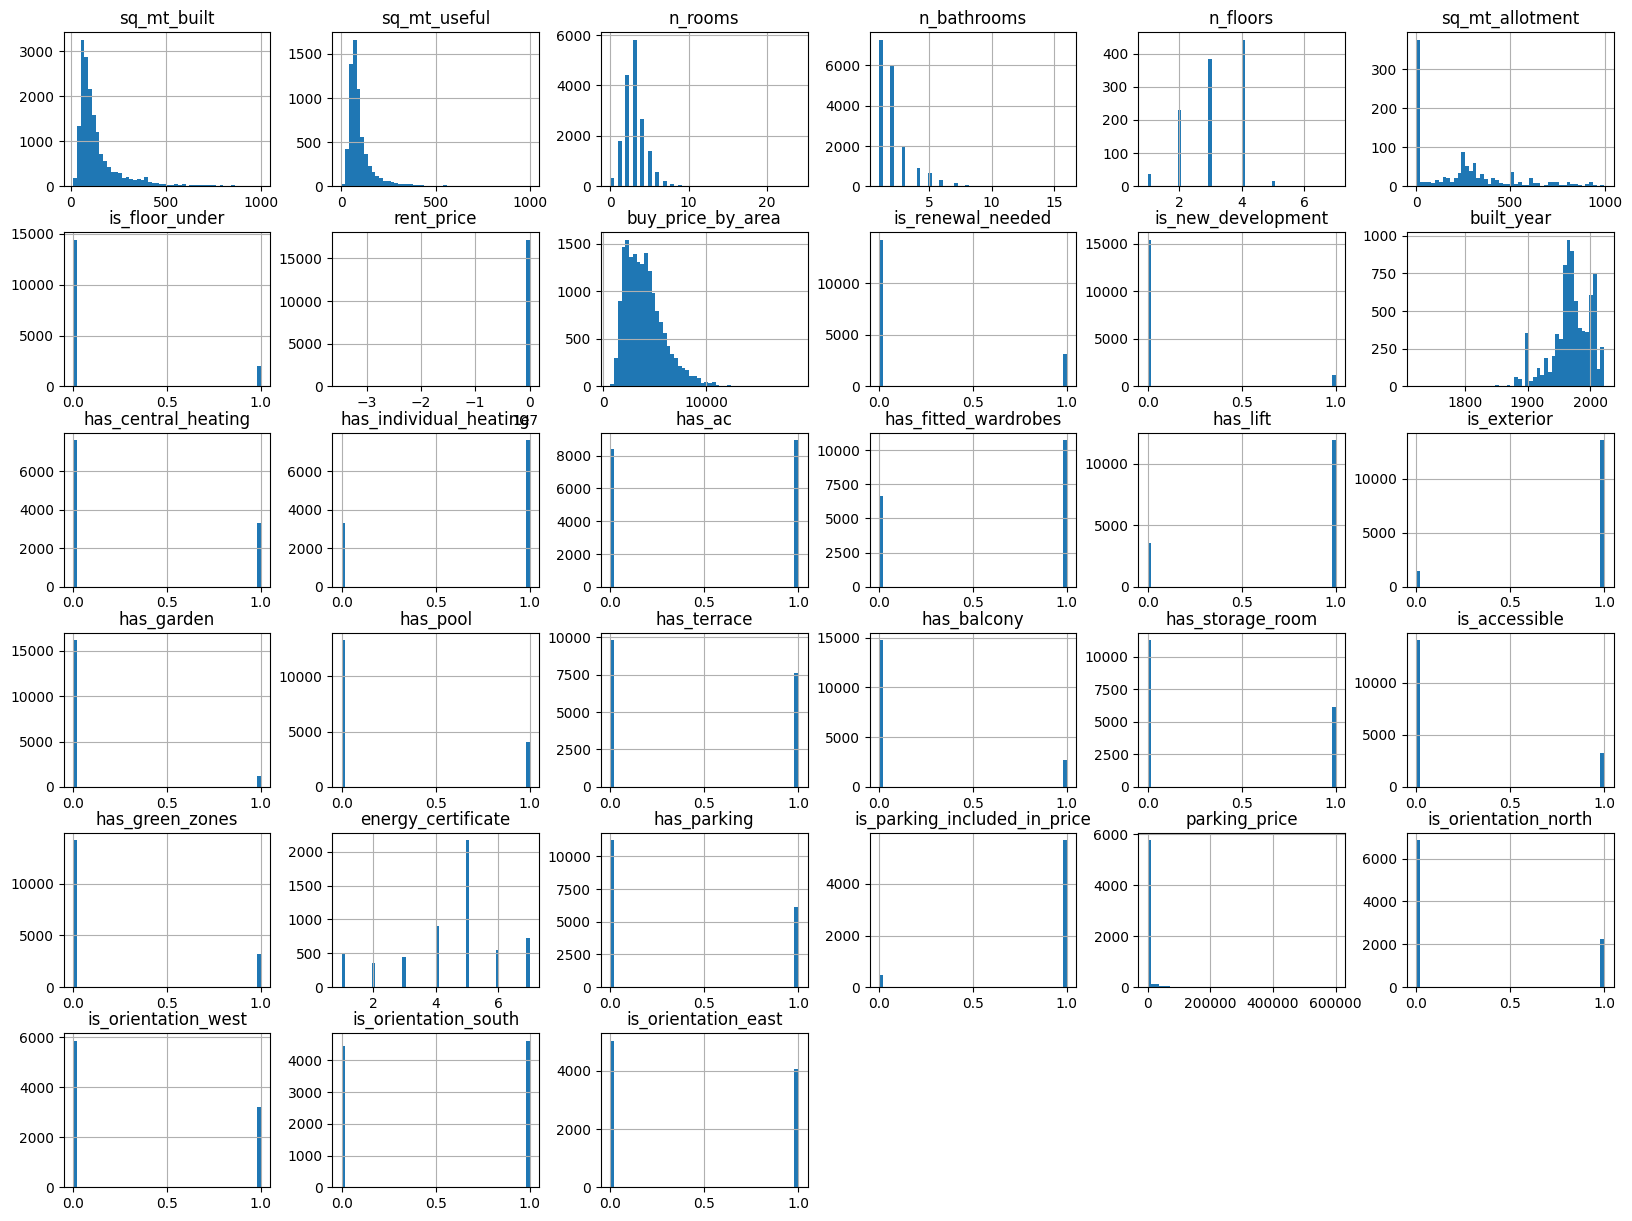

In [10]:
X_train.hist(bins=50, figsize=(20,15))

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Séparation des variables booléennes, numériques, et qualitatives</h3>
    <p>Avec une fonction personnelle importées de <strong>preprocess_utils.py</strong></p>
</div>

In [11]:
X_train_bool, X_train_num, X_train_quali, bool_cols, num_cols, quali_cols = split_by_dtype(X_train, convert_bool=True, bool_dtype='UInt8')

print(f"bool: {bool_cols}\n")
print(f"numeric: {num_cols}\n")
print(f"qualitative: {quali_cols}\n")
print(X_train_bool.shape, X_train_num.shape, X_train_quali.shape)

bool: ['is_floor_under', 'is_renewal_needed', 'is_new_development', 'has_central_heating', 'has_individual_heating', 'has_ac', 'has_fitted_wardrobes', 'has_lift', 'is_exterior', 'has_garden', 'has_pool', 'has_terrace', 'has_balcony', 'has_storage_room', 'is_accessible', 'has_green_zones', 'has_parking', 'is_parking_included_in_price', 'is_orientation_north', 'is_orientation_west', 'is_orientation_south', 'is_orientation_east']

numeric: ['sq_mt_built', 'sq_mt_useful', 'n_rooms', 'n_bathrooms', 'n_floors', 'sq_mt_allotment', 'rent_price', 'buy_price_by_area', 'built_year', 'energy_certificate', 'parking_price']

qualitative: ['floor', 'product', 'neighborhood']

(17393, 22) (17393, 11) (17393, 3)


<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Distribution des valeurs des variables numériques</h3>
</div>

array([[<Axes: title={'center': 'sq_mt_built'}>,
        <Axes: title={'center': 'sq_mt_useful'}>,
        <Axes: title={'center': 'n_rooms'}>],
       [<Axes: title={'center': 'n_bathrooms'}>,
        <Axes: title={'center': 'n_floors'}>,
        <Axes: title={'center': 'sq_mt_allotment'}>],
       [<Axes: title={'center': 'rent_price'}>,
        <Axes: title={'center': 'buy_price_by_area'}>,
        <Axes: title={'center': 'built_year'}>],
       [<Axes: title={'center': 'energy_certificate'}>,
        <Axes: title={'center': 'parking_price'}>, <Axes: >]],
      dtype=object)

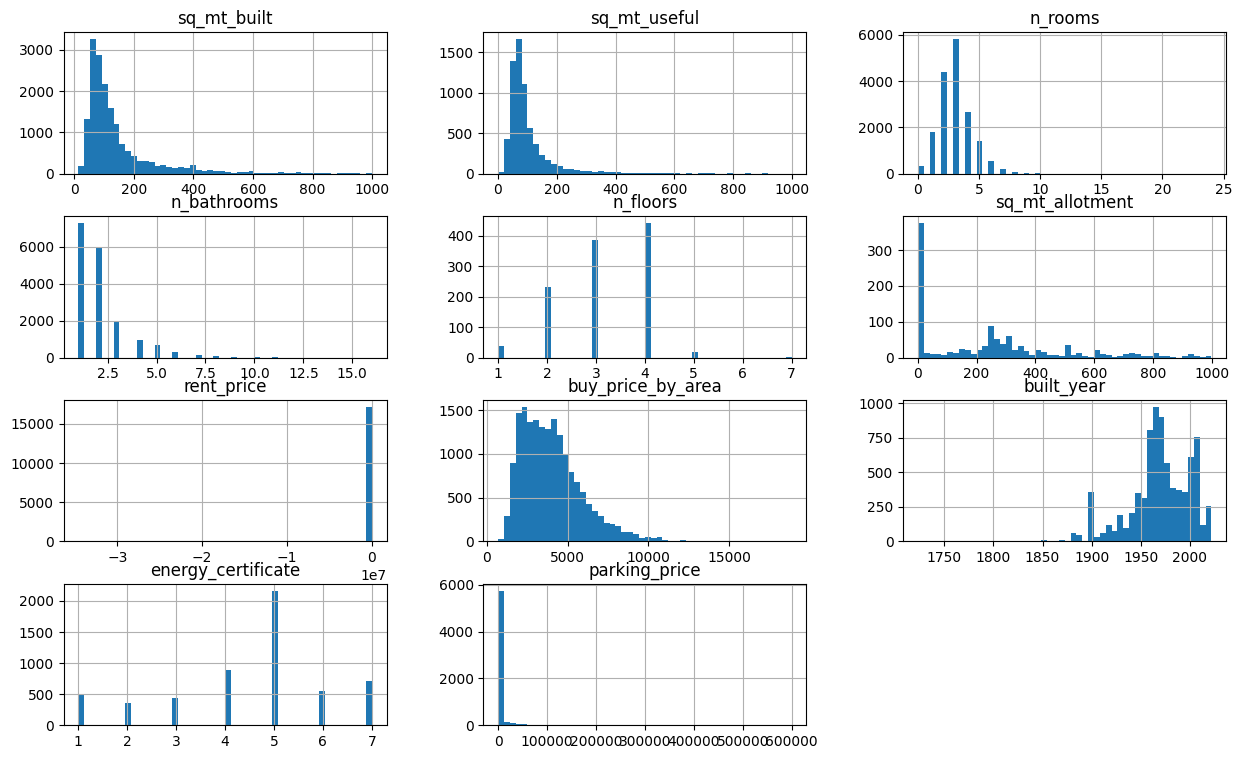

In [12]:
X_train_num.hist(bins=50, figsize=(15,9))

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>Distribution des valeurs des variables qualitatives</h3>
</div>

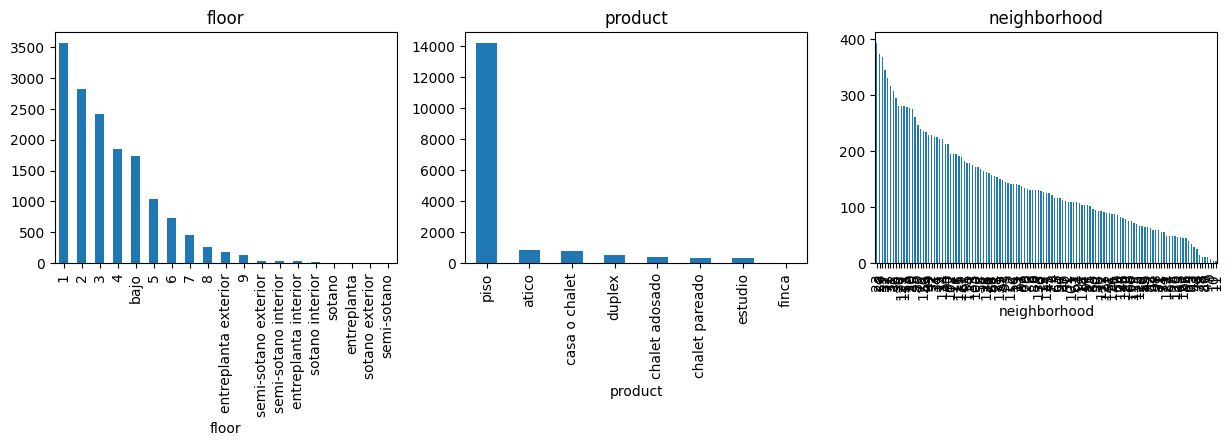

In [13]:
# Visualisation des différentes valeurs des variables catégorielles
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for ax, col in zip(axes.flatten(), quali_cols):
    X_train[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)

<div style="
    background-color: #439cc8; 
    color: white; 
    font-size: 16px; 
    font-style: italic; 
    padding: 10px 15px; 
    margin-bottom: 15px; 
    border-radius: 8px;">
    <h3>scatter_matrix</h3>
    <h4>Etude des relations feature ↔ feature (variables indépendantes)</h4>
    <p>la redondance entre variables<br>
    la colinéarité (problème pour régression linéaire)</p>
    <h4>Etude des relations feature ↔ target (variables indépendante/dépendante)</h4>
    <p>quelles features ont une relation claire avec y<br>
    lesquelles sont bruitées<br>
    lesquelles ont une relation non linéaire<br>
    si des outliers influencent la target<br>
</div>

array([[<Axes: xlabel='sq_mt_built', ylabel='sq_mt_built'>,
        <Axes: xlabel='sq_mt_useful', ylabel='sq_mt_built'>,
        <Axes: xlabel='n_rooms', ylabel='sq_mt_built'>,
        <Axes: xlabel='n_bathrooms', ylabel='sq_mt_built'>,
        <Axes: xlabel='n_floors', ylabel='sq_mt_built'>,
        <Axes: xlabel='sq_mt_allotment', ylabel='sq_mt_built'>,
        <Axes: xlabel='rent_price', ylabel='sq_mt_built'>,
        <Axes: xlabel='buy_price_by_area', ylabel='sq_mt_built'>,
        <Axes: xlabel='built_year', ylabel='sq_mt_built'>,
        <Axes: xlabel='energy_certificate', ylabel='sq_mt_built'>,
        <Axes: xlabel='parking_price', ylabel='sq_mt_built'>,
        <Axes: xlabel='target', ylabel='sq_mt_built'>],
       [<Axes: xlabel='sq_mt_built', ylabel='sq_mt_useful'>,
        <Axes: xlabel='sq_mt_useful', ylabel='sq_mt_useful'>,
        <Axes: xlabel='n_rooms', ylabel='sq_mt_useful'>,
        <Axes: xlabel='n_bathrooms', ylabel='sq_mt_useful'>,
        <Axes: xlabel='n_floors'

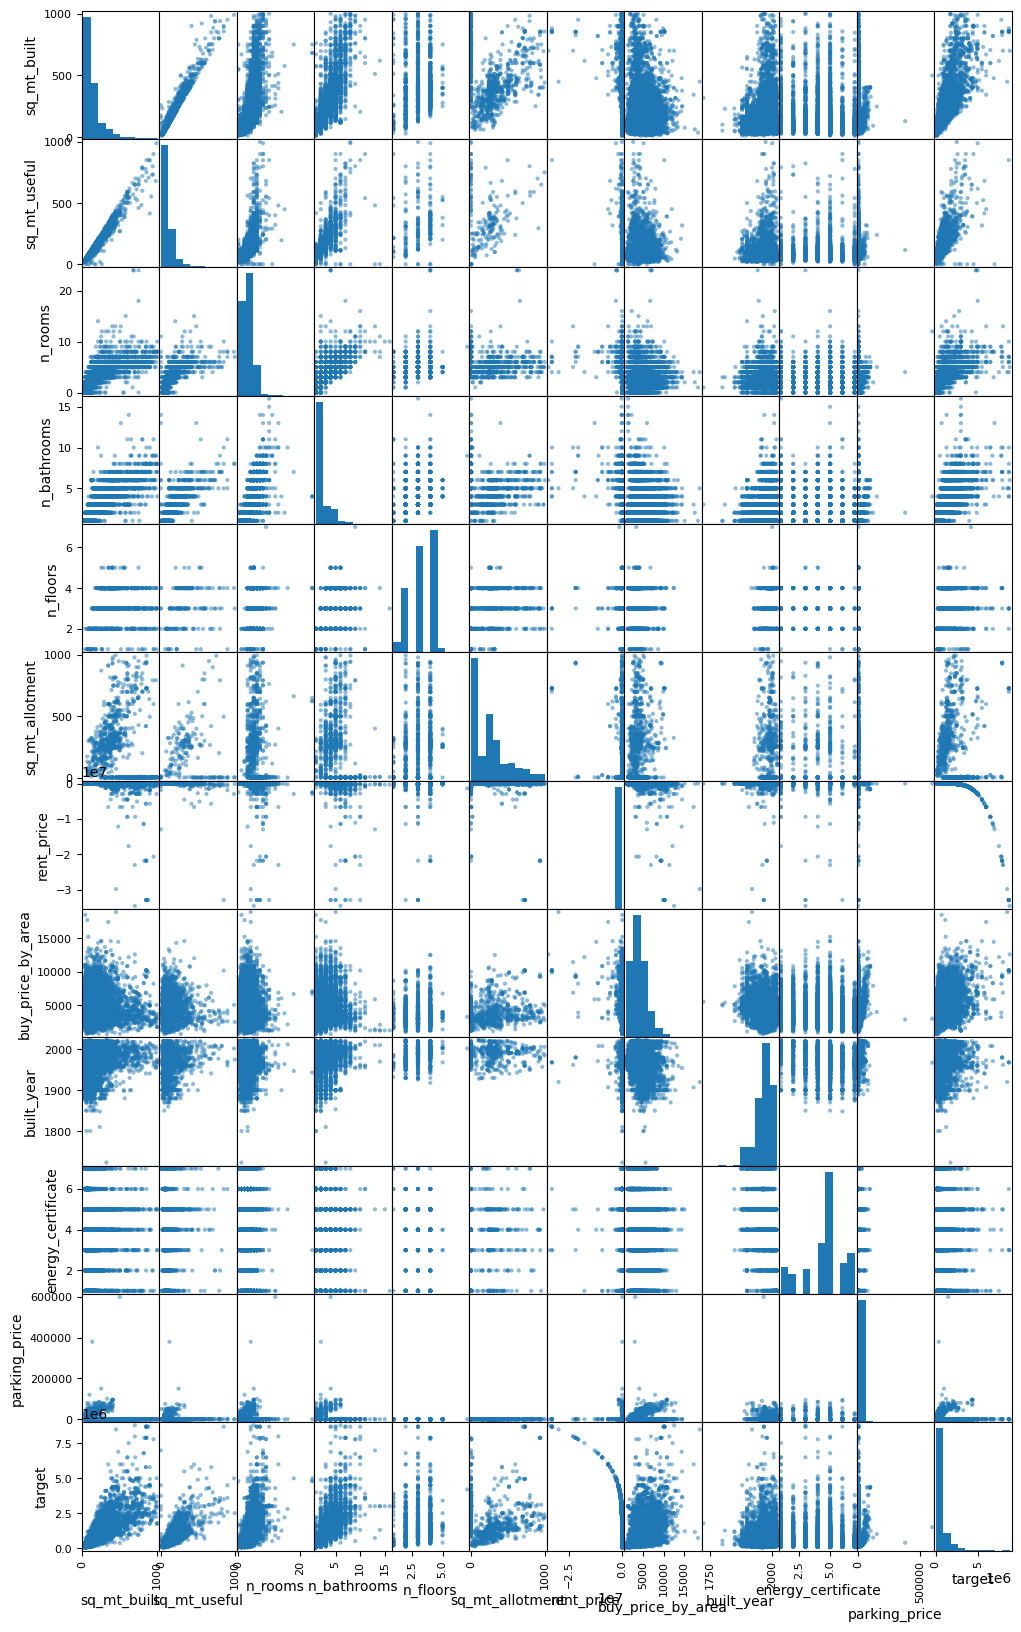

In [20]:
df_plot = X_train_num.copy()
df_plot['target'] = y_train

scatter_matrix(df_plot, figsize=(12, 20))


Variables à analyser (relation linéaire avec outliers):
- sq_mt_usefull
- parking_price
- sq_met_allotment
Variables à analyser (relation exponentielle):
- rent_price

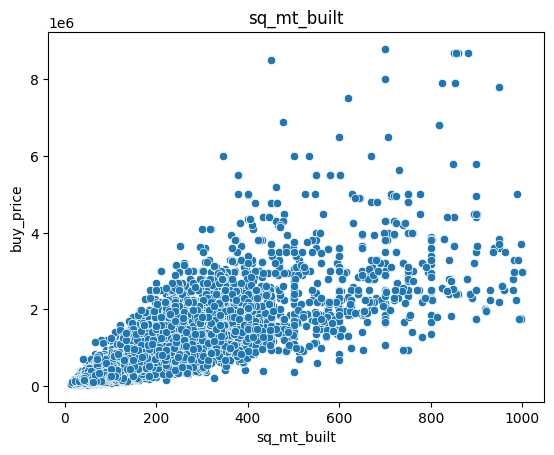

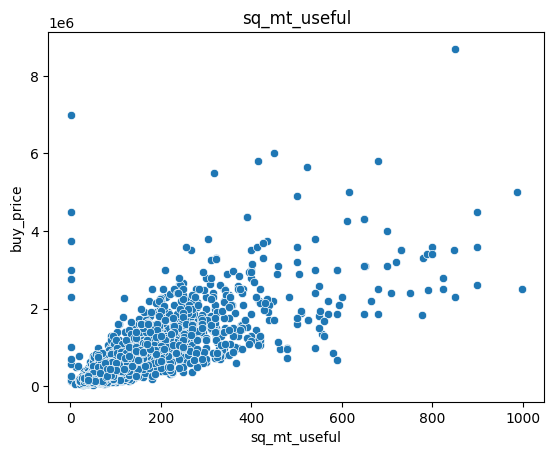

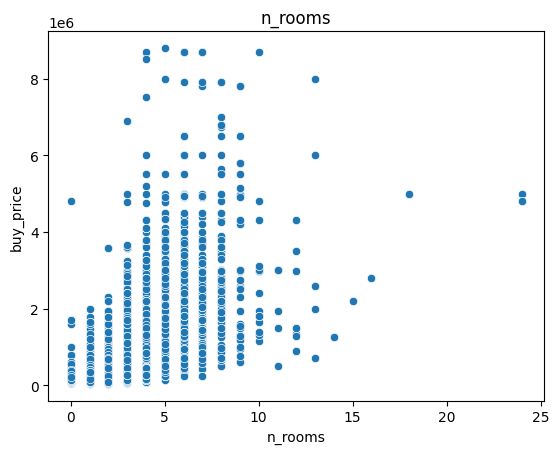

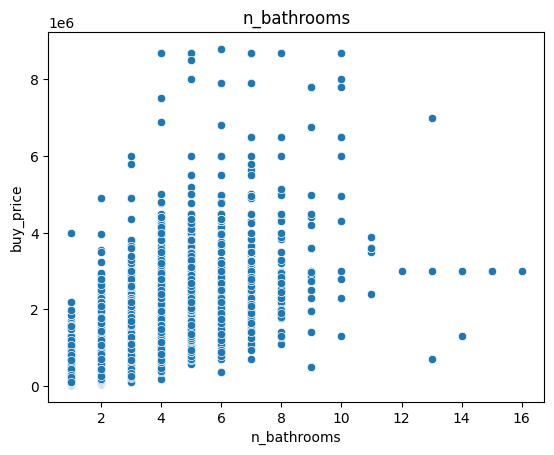

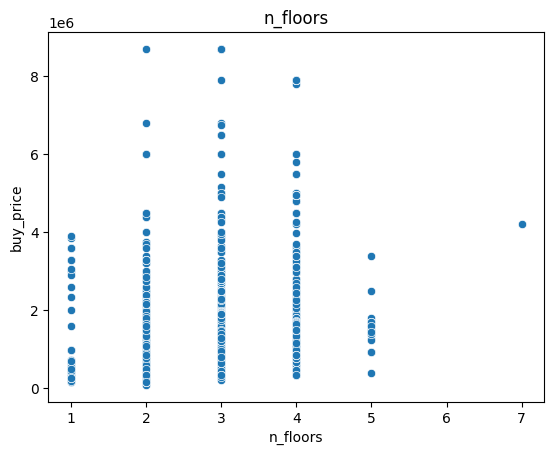

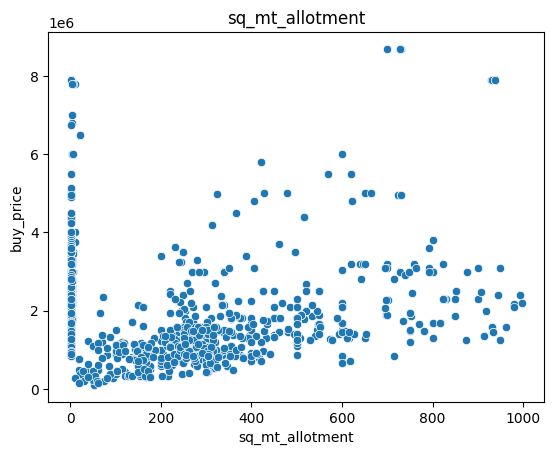

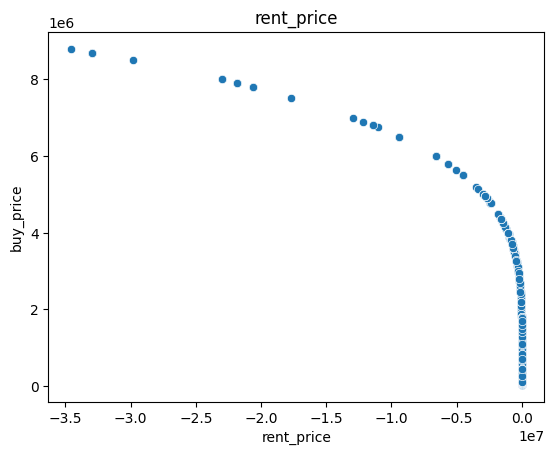

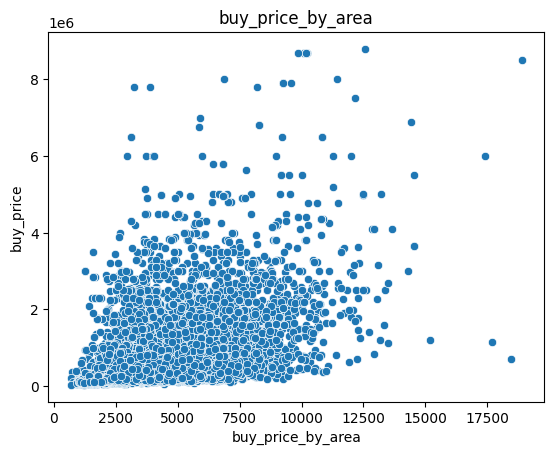

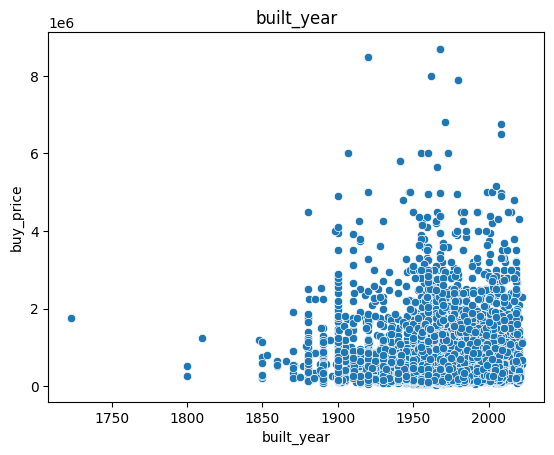

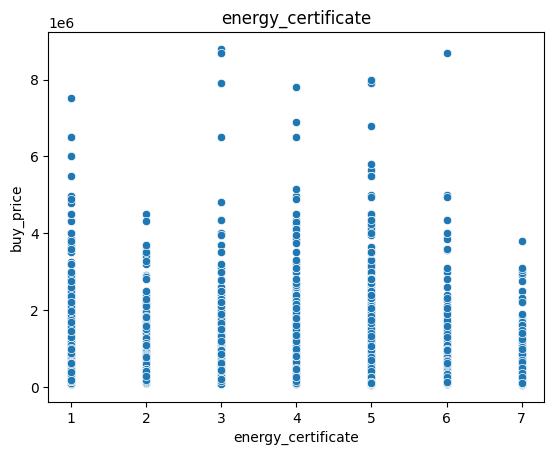

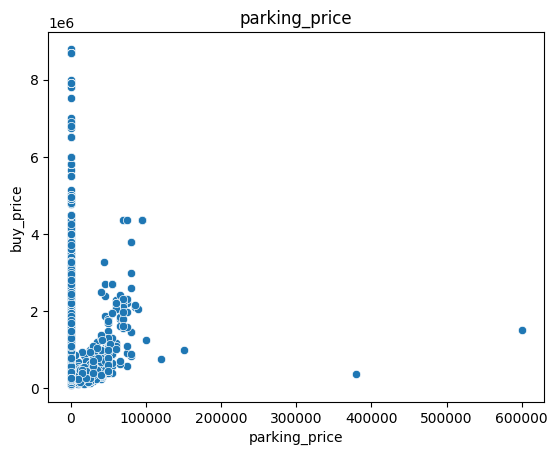

In [21]:
for col in X_train_num.columns:
    sns.scatterplot(x=X_train_num[col], y=y_train)
    plt.title(col)
    plt.show()


In [15]:
# # Réordonne X_train_num pour mettre buy_price en premier
# cols = ['buy_price'] + [c for c in X_train_num.columns if c != 'buy_price']
# X_train_num = X_train_num[cols]


In [16]:
# correlation_matrix = X_train_num.corr()

# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, square=True, fmt=".2f")
# plt.title("Matrice de corrélation")

target                1.000000
sq_mt_built           0.831972
sq_mt_useful          0.804539
n_bathrooms           0.767877
n_rooms               0.604796
buy_price_by_area     0.526493
n_floors              0.048325
parking_price         0.023240
built_year            0.017436
sq_mt_allotment      -0.007335
energy_certificate   -0.213718
rent_price           -0.491073
Name: target, dtype: float64


Text(0.5, 1.0, 'Matrice de corrélation')

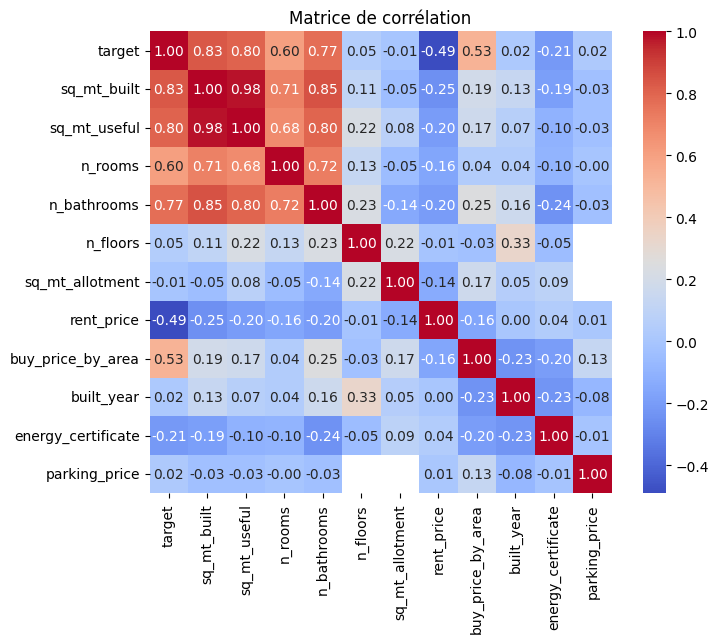

In [17]:
# Copier X_train_num
df_corr = X_train_num.copy()
# Ajouter la target en première colonne
df_corr.insert(0, 'target', y)

# Matrice de corrélation
corr_matrix = df_corr.corr()

# Afficher les corrélations avec la target, tri décroissant
print(corr_matrix['target'].sort_values(ascending=False))


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True, fmt=".2f")
plt.title("Matrice de corrélation")



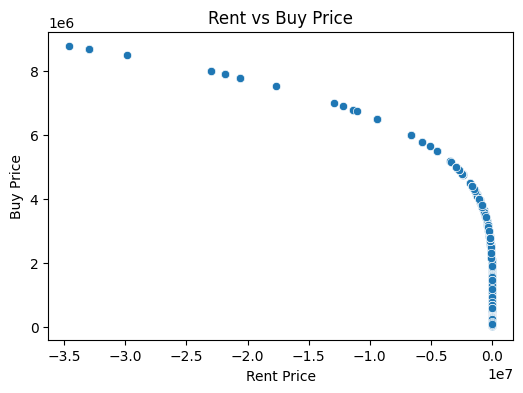

In [18]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='rent_price', y=y, data=X_train_num)
plt.title("Rent vs Buy Price")
plt.xlabel("Rent Price")
plt.ylabel("Buy Price")
plt.show()

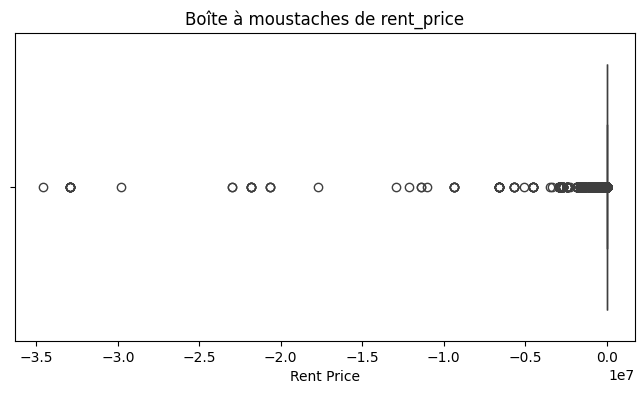

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['rent_price'])
plt.title("Boîte à moustaches de rent_price")
plt.xlabel("Rent Price")
plt.show()